## Simple PCA Example

Let's work through the simplest possible example of PCA so that you understand it conceptually.

At its core, PCA finds correlations in your data and uses these correlations to express your data in a more simple way.

We'll begin by creating a set of correlated bivariate data. Run the cell below to plot.

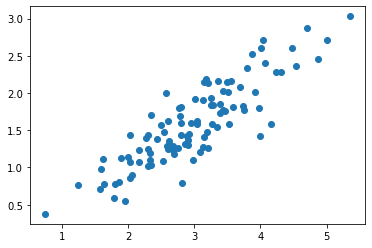

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create correlated data
x = np.random.randn(100)+3
y = 0.55 * x + .3 * np.random.randn(100)

# Create a scatterplot of this data
plt.figure()
plt.scatter(x, y)

Right now, x and y are separate vectors. The next cell creates a matrix called X whose first column is the vector x and whose second column is the vector y.

In [2]:
X = np.zeros((len(x), 2))
X[:,0] = x
X[:,1] = y
print(X.shape)

(100, 2)


The next step in computing PCA is to center the data. This means computing the mean of each column, and subtracting these means from the data. This is important because it places each feature into a similar range, and this keeps one feature from looking more important.

The next cell creates a centered version of X by computing the column means of X and subtracting them from X.

In [3]:
colMeans = np.mean(X, axis=0)
X = X - colMeans

Use the cell below to create a new scatterplot of both columns of X. How does this differ from the previous scatterplot?

The next step is to compute the covariance matrix of our data. X is a 100x2 matrix, so the covariance matrix will be 2x2. The diagonal elements (those at [0,0] and [1,1]) of the matrix will show the variance of each column, and the off-diagonal elements (those at [0,1] and [1,0]) show the correlation between the two variables.

Use [np.cov()](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) to compute the covariance matrix of X.T. Assign this to a variable called c and print it. What is the correlation between the two columns?

You can also see that the variance of the first column is larger than the variance of the second column. This makes sense because the first column ranges from -3 to +2 while the second column only ranges from -1.5 to 1.5.

PCA is going to try to find the direction of maximum variance within the data and make this its new X-axis. The direction that explains the next most variance will be the new Y-axis. In linear algebra, this is known as changing the basis of the data. We will do this by computing the eigenvectors and eigenvalues of the covariance matrix. If these terms are not yet familiar to you, don't worry. The eigenvectors represent the new directions of our new x and y axes, and the eigenvalues tell us how much magnitude each axis should have.

Run the cell below to compute the eigen-stuff.


In [4]:
from numpy.linalg import eig

values, vectors = eig(c)
print(values)
print(vectors)

NameError: name 'c' is not defined

If it were necessary, we would sort the eigenvalues in descending order, and re-order the eigenvectors accordingly. The eigenvectors are our principal components!

Let's plot them alongside our data. Run the following cell:

In [ ]:
# create a scatterplot of X
plt.figure()
plt.scatter(X[:,0], X[:,1])

# plot the first principal component as a red line
plt.plot([0, vectors[0,0]], [0, vectors[1,0]], color='r')

# plot the second principal component as a black line
plt.plot([0, vectors[0,1]], [0, vectors[1,1]], color='k')

Wonderful! Now let's project our data into the onto the new axes. This means that the new axes will be the principal components, rather than the original X and Y axes.

Run the cell below to show the original and projected data.

In [ ]:
projected = (np.dot(vectors.T, X.T)).T

plt.figure()
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1])
plt.plot([0, vectors[0,0]], [0, vectors[1,0]], color='r')
plt.plot([0, vectors[0,1]], [0, vectors[1,1]], color='k')
plt.title('Original')

plt.subplot(1,2,2)
plt.scatter(projected[:,0], projected[:,1])
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('Projected')

Let's now say that you only want to retain the first principal component. Create a new variable with just this component, create a new projection of your data, and plot it as before.